# Data Analysis For Local Runs: WASM/Rust vs JavaScript


Execution environment:

~~~javascript
{ 
    http_parser: '2.8.0',
    node: '9.11.1',
    v8: '6.2.414.46-node.23',
    uv: '1.19.2',
    zlib: '1.2.11',
    ares: '1.14.0',
    modules: '59',
    nghttp2: '1.29.0',
    napi: '3',
    openssl: '1.0.2o',
    icu: '61.1',
    unicode: '10.0',
    cldr: '33.0',
    tz: '2018c' 
}
~~~

## Helper Functions & Imports

Keep scrolling for charts!

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [19]:
def plot(df, title):
    plt.figure(figsize=(20,10))
    plt.title(title)
    plt.xlabel("Run #")
    plt.ylabel("Execution Time [s]")
    plt.plot(df["rs"], label="WASM/Rust")
    plt.plot(df["js"], label="Pure JavaScript")
    plt.legend()

# Approximating Pi

Pi approximation using the Monte Carlo method, using  10 000 000 iterations.

## Results

The local tests are executed in a simple for loop (this is [fish syntax](https://fishshell.com/)) to get a small number of data points to work with! By the way, `time -f "%e"` returns the execution time in seconds. 

~~~bash
> set -x N 20
> for i in (seq $N)
      echo -n "rs $i: "
      time -f "%e" node rs-bench-pi/local.js 
      echo -n "js $i: "
      time -f "%e" node js-bench-pi/local.js 
    end
rs 1: 3.1417980194091797
1.69
js 1: 3.1428708
0.38
...
rs 19: 3.1417980194091797
1.78
js 19: 3.1428708
0.43
rs 20: 3.1417980194091797
1.85
js 20: 3.1428708
0.40
~~~

In [13]:
rs = [1.69, 1.67, 1.67, 1.67, 1.66, 1.66, 1.69, 1.69, 1.68, 1.67, 1.68, 1.67, 1.66, 1.67, 1.68, 1.67, 1.70, 1.66, 1.78, 1.85]
js = [0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.42, 0.43, 0.40]

pi = pd.DataFrame({"rs": rs, "js": js})
pi.head()

,rs,js
0,1.69,0.38
1,1.67,0.38
2,1.67,0.38
3,1.67,0.39
4,1.66,0.39


,rs,js
count,20.000000,20.000000
mean,1.688500,0.388000
std,0.046143,0.013992
min,1.660000,0.380000
25%,1.670000,0.380000
50%,1.670000,0.380000
75%,1.690000,0.390000
max,1.850000,0.430000


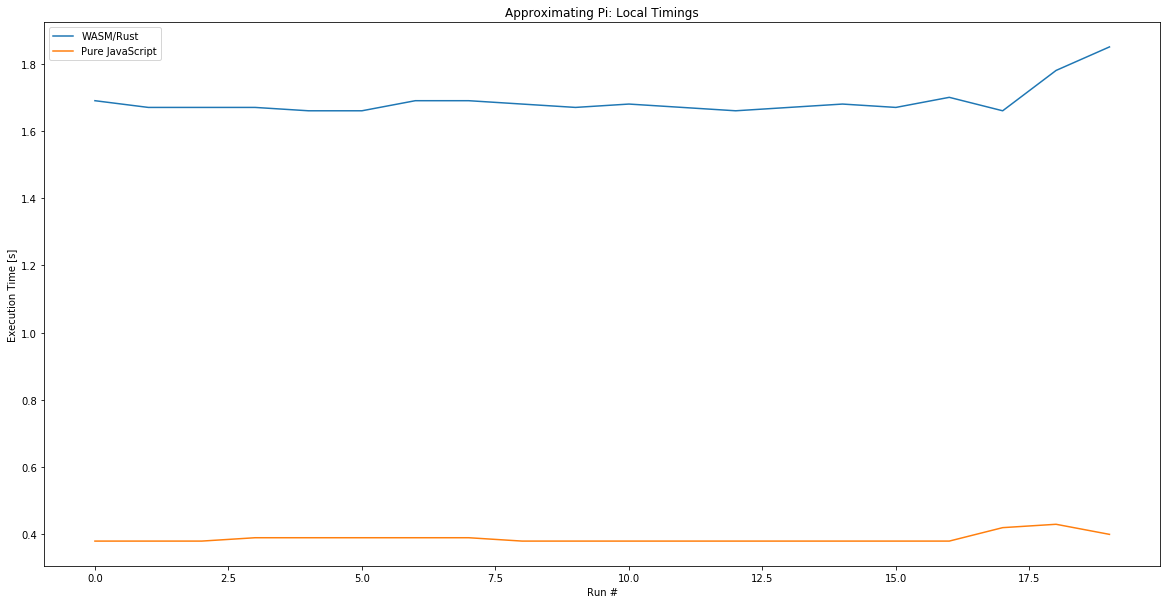

In [22]:
plot(pi, "Approximating Pi: Local Timings")
pi.describe()

# Fibonacci Numbers

Recursively calculate the Fibonacci sequence up to 43 (why? The result is the largest 32 bit signed integer, unfortunately WASM can't handle 64 bits currently).


## Results

The local tests are executed in a simple for loop (this is [fish syntax](https://fishshell.com/)) to get a small number of data points to work with! By the way, `time -f "%e"` returns the execution time in seconds. 

~~~bash
> for i in (seq $N)
      echo -n "rs $i: "
      time -f "%e" node rs-bench-fib/local.js 
      echo -n "js $i: "
      time -f "%e" node js-bench-fib/local.js 
  end
rs 1: 433494437
1.13
js 1: 433494437
2.72
rs 2: 433494437
1.10
js 2: 433494437
2.76
...
rs 19: 433494437
1.15
js 19: 433494437
2.85
rs 20: 433494437
1.15
js 20: 433494437
2.87

~~~

In [15]:
rs = [1.13, 1.10, 1.13, 1.19, 1.15, 1.18, 1.20, 1.21, 1.21, 1.19, 1.19, 1.15, 1.15, 1.14, 1.15, 1.14, 1.14, 1.16, 1.15, 1.15]
js = [2.72, 2.76, 2.89, 2.96, 2.97, 2.96, 2.97, 3.01, 2.97, 2.96, 2.92, 2.95, 2.92, 2.95, 2.96, 2.92, 2.95, 2.88, 2.85, 2.87]

fib = pd.DataFrame({"rs": rs, "js": js})
fib.head()

,rs,js
0,1.13,2.72
1,1.10,2.76
2,1.13,2.89
3,1.19,2.96
4,1.15,2.97


,rs,js
count,20.00000,20.000000
mean,1.16050,2.917000
std,0.02982,0.072555
min,1.10000,2.720000
25%,1.14000,2.887500
50%,1.15000,2.950000
75%,1.19000,2.960000
max,1.21000,3.010000


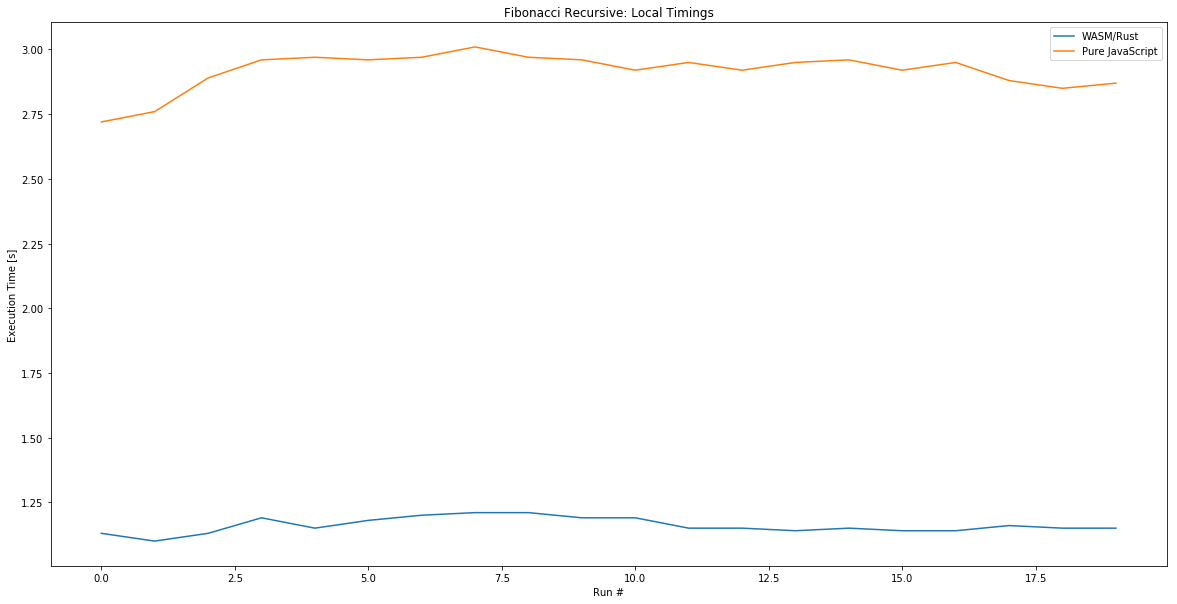

In [23]:
plot(fib, "Fibonacci Recursive: Local Timings")
fib.describe()